
#Python Notebook 1

- Author - D.M.G. Pamodi Pansiluni
- UoW ID - w2053166
- IIT ID - 20230614
- Code Peer Reviewer - Misal Silva





Reused Code Block from Code Reuse Session 1 (Week 5) – Coursework Data Understanding and Preparation
This code block imports all the essential Python libraries needed for data preprocessing, analysis, and visualization. These libraries are reused from Session 1 and are crucial for loading the cancer dataset, handling missing values, encoding categorical variables, and performing data standardization before building regression models for predicting survival months.

In [69]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

Reused from Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5)
This block loads the cancer dataset and previews the first 5 rows to understand the data structure before preprocessing.

In [70]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Machine Learning - CW/5DATA002W.2 Coursework Dataset(25012025v6.0).csv')
# Print the first 5 rows of the dataset
print(data.head())

  Patient_ID  Month_of_Birth   Age     Sex   Occupation T_Stage N_Stage  \
0      A0012              12  68.0  Female     Teaching      T1      N1   
1      A0013              12  50.0  Female      Medical      T2      N2   
2      A0014              11  58.0  Female  Engineering      T3      N3   
3      A0015               3  58.0  Female   Technology      T1      N1   
4      A0016               1  47.0  Female   Multimedia      T2      N1   

  6th_Stage             Differentiated  Grade   A_Stage  Tumor_Size  \
0       IIA      Poorly differentiated      3  Regional         4.0   
1      IIIA  Moderately differentiated      2  Regional        35.0   
2      IIIC  Moderately differentiated      2  Regional        63.0   
3       IIA      Poorly differentiated      3  Regional        18.0   
4       IIB      Poorly differentiated      3  Regional        41.0   

  Estrogen_Status Progesterone_Status  Regional_Node_Examined  \
0        Positive            Positive                    

Reused from Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5)
This block checks for missing values in the dataset, which is a key step in data cleaning.

In [71]:
# Print the sum of null values for each column
print(data.isnull().sum())

Patient_ID                   0
Month_of_Birth               0
Age                          9
Sex                          4
Occupation                3981
T_Stage                      0
N_Stage                      0
6th_Stage                    0
Differentiated               0
Grade                        0
A_Stage                      0
Tumor_Size                   3
Estrogen_Status              0
Progesterone_Status          0
Regional_Node_Examined       1
Reginol_Node_Positive        0
Survival_Months              0
Mortality_Status             0
dtype: int64


Reused from Code Reuse Session 1 (Week 5)
Drops irrelevant columns that do not contribute to survival month prediction.

In [72]:
# Drop unnecessary columns
data.drop(columns=['Patient_ID','Occupation','Month_of_Birth'], inplace=True)

Reused from Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5)
Rechecks for missing values after dropping unnecessary columns.

In [73]:
# Print the sum of null values for each column after dropping columns
print(data.isnull().sum())

Age                       9
Sex                       4
T_Stage                   0
N_Stage                   0
6th_Stage                 0
Differentiated            0
Grade                     0
A_Stage                   0
Tumor_Size                3
Estrogen_Status           0
Progesterone_Status       0
Regional_Node_Examined    1
Reginol_Node_Positive     0
Survival_Months           0
Mortality_Status          0
dtype: int64


Reused from Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5)
Displays the data types of each column to ensure proper data handling for modeling.

In [74]:
# Print the data types of each column
print(data.dtypes)

Age                       float64
Sex                        object
T_Stage                    object
N_Stage                    object
6th_Stage                  object
Differentiated             object
Grade                       int64
A_Stage                    object
Tumor_Size                float64
Estrogen_Status            object
Progesterone_Status        object
Regional_Node_Examined    float64
Reginol_Node_Positive       int64
Survival_Months             int64
Mortality_Status           object
dtype: object


Reused from Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5)
Identifies numerical columns with missing values to focus on imputation for further preprocessing.

In [75]:
# Select numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Get variable names with missing values
missing_vars = [var for var in numerical_cols if data[var].isnull().any()]

print("Variable names with missing values in numerical columns:")
print(missing_vars)

Variable names with missing values in numerical columns:
['Age', 'Tumor_Size', 'Regional_Node_Examined']


Reused from Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5)
Imputes missing values in numerical columns with the mean and in categorical columns with the most frequent value.

In [76]:
# Impute missing numerical values with the mean
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

# Impute missing categorical values with the most frequent value
categorical_cols = data.select_dtypes(include=['object']).columns
imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer.fit_transform(data[categorical_cols])

Reused from Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5)
Identifies numerical columns with missing values for targeted imputation.

In [77]:
# Select numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Get variable names with missing values
missing_vars = [var for var in numerical_cols if data[var].isnull().any()]

print("Variable names with missing values in numerical columns:")
print(missing_vars)

Variable names with missing values in numerical columns:
[]


Reused from Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5)
Rechecks for missing values after imputing the numerical and categorical columns.

In [78]:
# Print the sum of null values for each column after imputation
print(data.isnull().sum())

Age                       0
Sex                       0
T_Stage                   0
N_Stage                   0
6th_Stage                 0
Differentiated            0
Grade                     0
A_Stage                   0
Tumor_Size                0
Estrogen_Status           0
Progesterone_Status       0
Regional_Node_Examined    0
Reginol_Node_Positive     0
Survival_Months           0
Mortality_Status          0
dtype: int64


Reused from Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5)
Checks for duplicate rows in the dataset to ensure data integrity.

In [79]:
# Print the number of duplicated rows
print(data.duplicated().sum())

1


Reused from Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5)
Displays all duplicate rows in the dataset for further inspection and handling.

In [80]:
# Print all duplicated rows in the DataFrame 'data'.
print(data[data.duplicated(keep=False)])

      Age     Sex T_Stage N_Stage 6th_Stage             Differentiated  Grade  \
213  63.0  Female      T1      N1       IIA  Moderately differentiated    2.0   
436  63.0  Female      T1      N1       IIA  Moderately differentiated    2.0   

      A_Stage  Tumor_Size Estrogen_Status Progesterone_Status  \
213  Regional        17.0        Positive            Positive   
436  Regional        17.0        Positive            Positive   

     Regional_Node_Examined  Reginol_Node_Positive  Survival_Months  \
213                     9.0                    1.0             56.0   
436                     9.0                    1.0             56.0   

    Mortality_Status  
213            Alive  
436            Alive  


Reused from Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5)
Removes duplicate rows from the dataset to ensure clean and unique data.

In [81]:
# Drop duplicated rows
data.drop_duplicates(inplace=True)

Reused from Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5) Checks for duplicate rows in the dataset to ensure data integrity.

In [82]:
# Print the number of duplicated rows after dropping duplicates
print(data.duplicated().sum())

0


Reused from Code Reuse Session 1 (Week 5)
Rechecks for any remaining duplicate rows after dropping duplicates.

In [83]:
# Print all duplicated rows in the DataFrame 'data'.
print(data[data.duplicated(keep=False)])

Empty DataFrame
Columns: [Age, Sex, T_Stage, N_Stage, 6th_Stage, Differentiated, Grade, A_Stage, Tumor_Size, Estrogen_Status, Progesterone_Status, Regional_Node_Examined, Reginol_Node_Positive, Survival_Months, Mortality_Status]
Index: []


Reused from Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5)
Assigns the dataset to a new variable df for easier reference in subsequent operations.

In [84]:
# Assign the dataframe to a new variable df
df=data

Reused from Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5)
Prints the data types of each column in the df to verify the correct variable scales before modeling.

In [85]:
# Print the data types of each column
print("\nVariable Scale Types:")
print(df.dtypes)


Variable Scale Types:
Age                       float64
Sex                        object
T_Stage                    object
N_Stage                    object
6th_Stage                  object
Differentiated             object
Grade                     float64
A_Stage                    object
Tumor_Size                float64
Estrogen_Status            object
Progesterone_Status        object
Regional_Node_Examined    float64
Reginol_Node_Positive     float64
Survival_Months           float64
Mortality_Status           object
dtype: object


In [86]:
# Print descriptive statistics of the dataframe
print(df.describe())

               Age        Grade   Tumor_Size  Regional_Node_Examined  \
count  4023.000000  4023.000000  4023.000000             4023.000000   
mean     54.104888     2.150634    30.422634               14.374938   
std      11.703031     0.638309    21.154760                8.128851   
min     -50.000000     1.000000   -75.000000                1.000000   
25%      47.000000     2.000000    16.000000                9.000000   
50%      54.000000     2.000000    25.000000               14.000000   
75%      61.000000     3.000000    38.000000               19.000000   
max     502.000000     4.000000   140.000000               61.000000   

       Reginol_Node_Positive  Survival_Months  
count            4023.000000      4023.000000  
mean                4.158837        71.476013  
std                 5.109724        25.363834  
min                 1.000000         1.000000  
25%                 1.000000        56.000000  
50%                 2.000000        73.000000  
75%            

Reused from Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5)
Generates box plots for key columns to visualize data distribution and identify potential outliers.

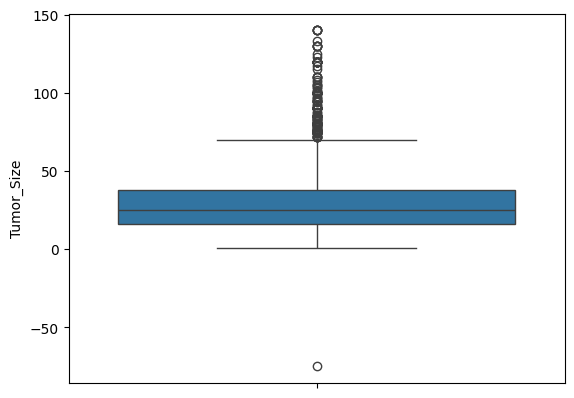

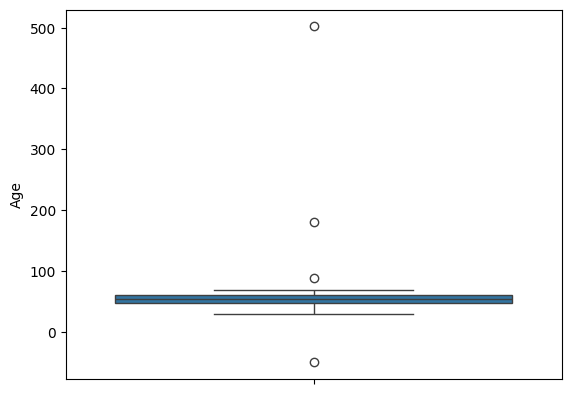

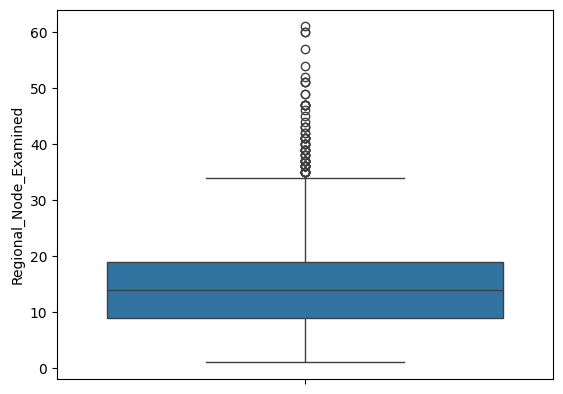

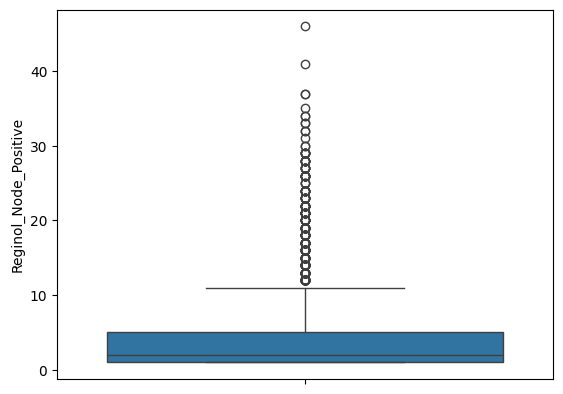

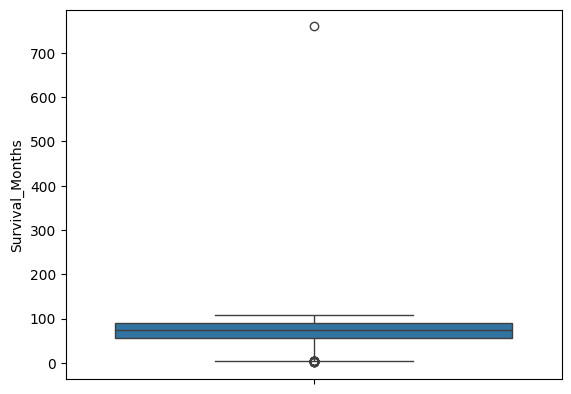

In [87]:
# Create box plots for specified columns
for i in ['Tumor_Size','Age','Regional_Node_Examined','Reginol_Node_Positive','Survival_Months']:
  sns.boxplot(df[i])
  plt.show()

Reused from Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5)
Defines a function to calculate the whisker bounds for outlier detection using the interquartile range (IQR).

In [88]:
# Define a function to calculate whisker bounds for outlier detection
def wisker(col):
  q1,q3=np.percentile(col,[25,75])
  iqr=q3-q1
  upper_bound=q3+(1.5*iqr)
  lower_bound=q1-(1.5*iqr)
  return upper_bound,lower_bound

Reused from Code Reuse Session 1 (Week 5)
Removes rows with missing values from the dataset to ensure completeness for analysis.

In [89]:
# Drop rows with missing values
df.dropna(inplace=True)

Reused from Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5)
Calculates the whisker bounds for the 'Tumor_Size' column to detect potential outliers.

In [90]:
# Calculate whisker bounds for 'Tumor_Size'
wisker(df['Tumor_Size'])

(np.float64(71.0), np.float64(-17.0))

Reused from Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5)
Replaces outliers in specified columns with the calculated whisker bounds to ensure data consistency.

In [91]:
# Replace outliers with whisker bounds for specified columns
for i in ['Tumor_Size','Age','Regional_Node_Examined','Reginol_Node_Positive','Survival_Months']:
  upper_bound,lower_bound=wisker(df[i])
  df[i]=np.where(df[i]>upper_bound,upper_bound,df[i])
  df[i]=np.where(df[i]<lower_bound,lower_bound,df[i])

Reused from Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5)
Generates box plots for specified columns after outlier handling to visualize the cleaned data distribution.

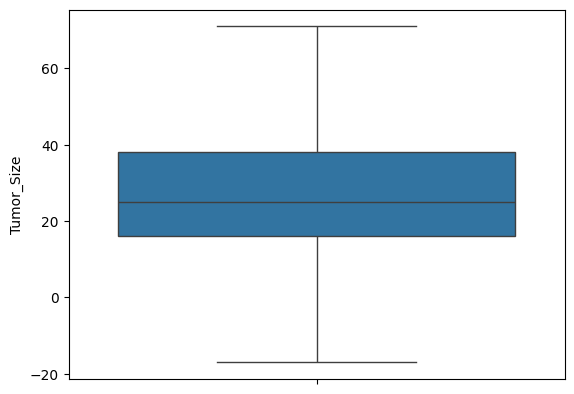

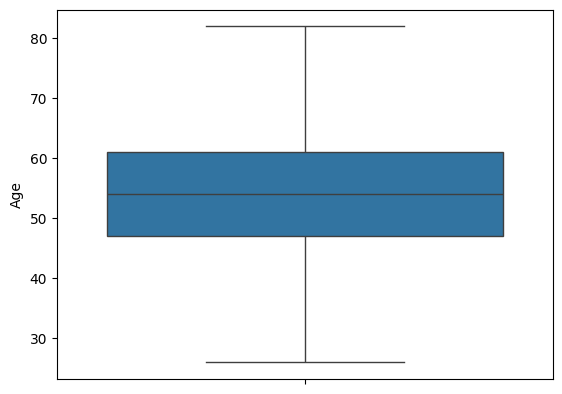

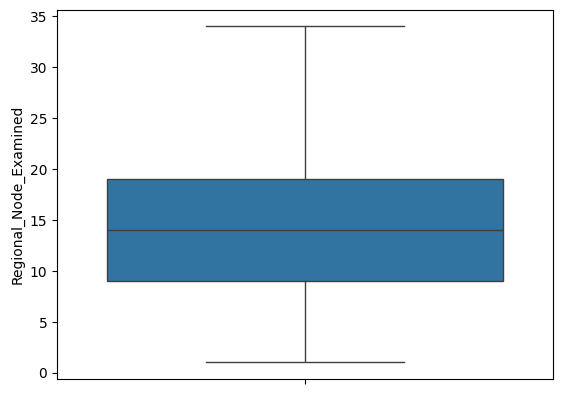

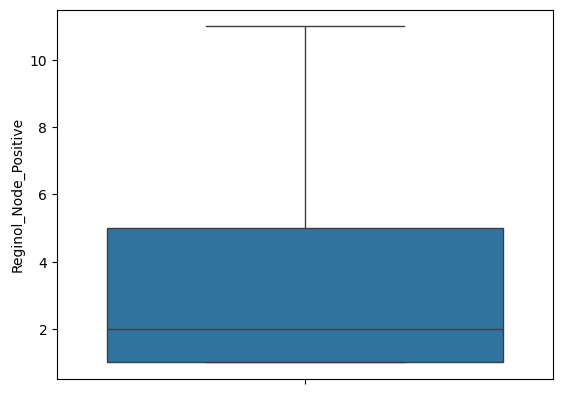

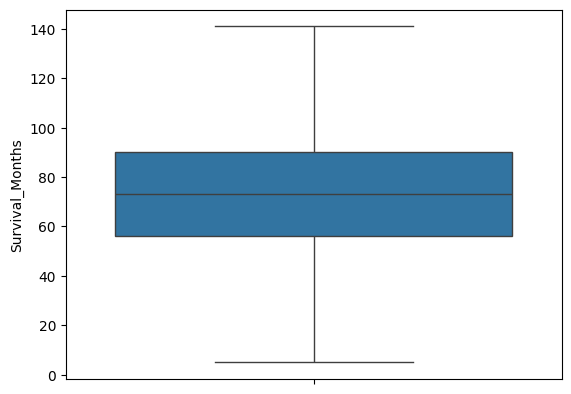

In [92]:
# Create box plots for specified columns after outlier handling
for i in ['Tumor_Size','Age','Regional_Node_Examined','Reginol_Node_Positive','Survival_Months']:
  sns.boxplot(df[i])
  plt.show()

Reused from Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5)
Prints the sum of null values for each column to verify if any missing values remain after data preprocessing.

In [93]:
# Print the sum of null values for each column
df.isnull().sum()

,0
Age,0
Sex,0
T_Stage,0
N_Stage,0
6th_Stage,0
Differentiated,0
Grade,0
A_Stage,0
Tumor_Size,0
Estrogen_Status,0


Reused from Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5)
Prints the value counts for each categorical column to understand the distribution of categorical data.

In [94]:
# Print value counts for each categorical column
for col in df.select_dtypes(include=['object']).columns:
    print(df[col].value_counts())

Sex
Female    4004
1           19
Name: count, dtype: int64
T_Stage
T2    1786
T1    1602
T3     533
T4     102
Name: count, dtype: int64
N_Stage
N1    2731
N2     820
N3     472
Name: count, dtype: int64
6th_Stage
IIA     1304
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: count, dtype: int64
Differentiated
Moderately differentiated    2350
Poorly differentiated        1111
Well differentiated           543
Undifferentiated               19
Name: count, dtype: int64
A_Stage
Regional    3931
Distant       92
Name: count, dtype: int64
Estrogen_Status
Positive    3754
Negative     269
Name: count, dtype: int64
Progesterone_Status
Positive    3325
Negative     698
Name: count, dtype: int64
Mortality_Status
Alive    3398
Dead      598
DEAD       10
dead        8
ALIVE       5
alive       3
ALive       1
Name: count, dtype: int64


In [95]:
# Print descriptive statistics of the dataframe
print(df.describe())

               Age        Grade   Tumor_Size  Regional_Node_Examined  \
count  4023.000000  4023.000000  4023.000000             4023.000000   
mean     53.993280     2.150634    29.317489               14.239466   
std       8.994942     0.638309    17.751976                7.677851   
min      26.000000     1.000000   -17.000000                1.000000   
25%      47.000000     2.000000    16.000000                9.000000   
50%      54.000000     2.000000    25.000000               14.000000   
75%      61.000000     3.000000    38.000000               19.000000   
max      82.000000     4.000000    71.000000               34.000000   

       Reginol_Node_Positive  Survival_Months  
count            4023.000000      4023.000000  
mean                3.568481        71.329853  
std                 3.281311        22.925849  
min                 1.000000         5.000000  
25%                 1.000000        56.000000  
50%                 2.000000        73.000000  
75%            

Reused from Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5)
Checks if there are any negative values in the 'Tumor_Size' column, ensuring data consistency.

In [96]:
# Check if there are any negative values in 'Tumor_Size'
print((df['Tumor_Size'] < 0).any())  # Should print False

True


Reused from Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5)
Creates a histogram for the 'Tumor_Size' column to visualize the distribution of tumor sizes in the dataset.

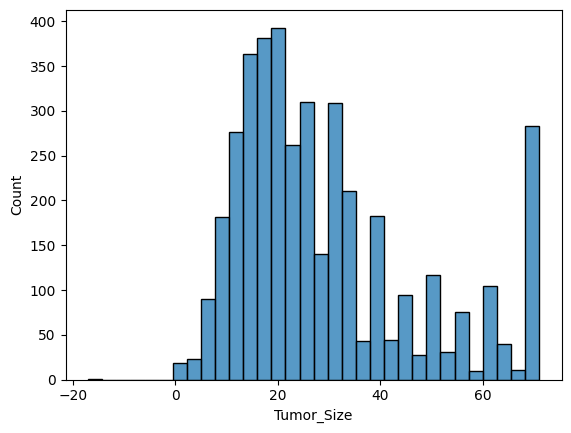

In [29]:
# Create a histogram of 'Tumor_Size'
sns.histplot(df['Tumor_Size'])
plt.show()

Reused from Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5)
Replaces negative values in the 'Tumor_Size' column with None and imputes missing values using the median to maintain data integrity.

In [97]:
# Replace negative values with None
df['Tumor_Size'] = df['Tumor_Size'].apply(lambda x: x if x >= 0 else None)

# Impute missing values (None) with the median
df['Tumor_Size'] = df['Tumor_Size'].fillna(df['Tumor_Size'].median())

Reused from Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5)
Verifies that there are no negative values in the 'Tumor_Size' column after performing the imputation.

In [98]:
# Check if there are any negative values in 'Tumor_Size' after imputation
print((df['Tumor_Size'] < 0).any())  # Should print False

False


In [99]:
# Check if there are any null values in 'Tumor_Size' after imputation
print(df['Tumor_Size'].isnull().any())  # Should print False

False


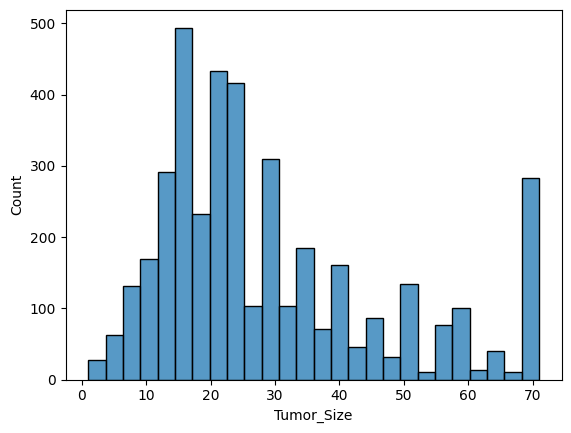

In [100]:
# Create a histogram of 'Tumor_Size' after imputation
sns.histplot(df['Tumor_Size'])
plt.show()

Reused from Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5)
Fills missing values in the 'Age', 'Tumor_Size', and 'Regional_Node_Examined' columns with their respective median values.

In [101]:
# Fill missing values in specified columns with the median
for i in ["Age","Tumor_Size","Regional_Node_Examined"]:
  df[i].fillna(df[i].median())

Reused from Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5)
Fills missing values in the 'Sex' column with the most frequent (mode) value.

In [102]:
# Fill missing values in 'Sex' with the mode
df['Sex'].fillna(df['Sex'].mode()[0])

,Sex
0,Female
1,Female
2,Female
3,Female
4,Female
...,...
4019,Female
4020,Female
4021,1
4022,Female


In [103]:
# Print the sum of null values for each column
df.isnull().sum()

,0
Age,0
Sex,0
T_Stage,0
N_Stage,0
6th_Stage,0
Differentiated,0
Grade,0
A_Stage,0
Tumor_Size,0
Estrogen_Status,0


Reused from Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5)
Fills any remaining missing values in the dataset with 0.

In [104]:
# Fill any remaining missing values with 0
df.fillna(0, inplace=True)

Reused from Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5)
Converts the 'Sex' column to a categorical data type and 'Grade' column to an integer data type.

In [105]:
# Convert 'Sex' and 'Grade' columns to appropriate data types
df['Sex'] = df['Sex'].astype('category')
df['Grade'] = df['Grade'].astype(int)

Reused from Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5)
Prints the data types of each column in the dataset to verify the variable scale types.

In [106]:
# Print the data types of each column
print("\nVariable Scale Types:")
print(df.dtypes)


Variable Scale Types:
Age                        float64
Sex                       category
T_Stage                     object
N_Stage                     object
6th_Stage                   object
Differentiated              object
Grade                        int64
A_Stage                     object
Tumor_Size                 float64
Estrogen_Status             object
Progesterone_Status         object
Regional_Node_Examined     float64
Reginol_Node_Positive      float64
Survival_Months            float64
Mortality_Status            object
dtype: object


In [107]:
# Print descriptive statistics of the dataframe
print(df.describe())

               Age        Grade   Tumor_Size  Regional_Node_Examined  \
count  4023.000000  4023.000000  4023.000000             4023.000000   
mean     53.993280     2.150634    29.327929               14.239466   
std       8.994942     0.638309    17.737074                7.677851   
min      26.000000     1.000000     1.000000                1.000000   
25%      47.000000     2.000000    16.000000                9.000000   
50%      54.000000     2.000000    25.000000               14.000000   
75%      61.000000     3.000000    38.000000               19.000000   
max      82.000000     4.000000    71.000000               34.000000   

       Reginol_Node_Positive  Survival_Months  
count            4023.000000      4023.000000  
mean                3.568481        71.329853  
std                 3.281311        22.925849  
min                 1.000000         5.000000  
25%                 1.000000        56.000000  
50%                 2.000000        73.000000  
75%            

Reused from Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5)
Checks for negative values in the columns 'Tumor_Size', 'Age', 'Regional_Node_Examined', and 'Survival_Months' and prints the count of negative values for each.

In [108]:
# Check for negative values and unique values in specific columns
print((df[['Tumor_Size', 'Age', 'Regional_Node_Examined', 'Survival_Months']] < 0).sum())

Tumor_Size                0
Age                       0
Regional_Node_Examined    0
Survival_Months           0
dtype: int64


In [109]:
# Print descriptive statistics of the dataframe
print(df.describe())

               Age        Grade   Tumor_Size  Regional_Node_Examined  \
count  4023.000000  4023.000000  4023.000000             4023.000000   
mean     53.993280     2.150634    29.327929               14.239466   
std       8.994942     0.638309    17.737074                7.677851   
min      26.000000     1.000000     1.000000                1.000000   
25%      47.000000     2.000000    16.000000                9.000000   
50%      54.000000     2.000000    25.000000               14.000000   
75%      61.000000     3.000000    38.000000               19.000000   
max      82.000000     4.000000    71.000000               34.000000   

       Reginol_Node_Positive  Survival_Months  
count            4023.000000      4023.000000  
mean                3.568481        71.329853  
std                 3.281311        22.925849  
min                 1.000000         5.000000  
25%                 1.000000        56.000000  
50%                 2.000000        73.000000  
75%            

Reused from Coursework Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5) to perform data cleaning and preparation by detecting and handling outliers in the numerical features, which will help improve the accuracy of the regression models used in later tasks.

In [110]:
# Calculate and print the number of outliers for numerical features
Q1 = df[['Age', 'Tumor_Size', 'Regional_Node_Examined', 'Survival_Months']].quantile(0.25)
Q3 = df[['Age', 'Tumor_Size', 'Regional_Node_Examined', 'Survival_Months']].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[['Age', 'Tumor_Size', 'Regional_Node_Examined', 'Survival_Months']] < (Q1 - 1.5 * IQR)) |
            (df[['Age', 'Tumor_Size', 'Regional_Node_Examined', 'Survival_Months']] > (Q3 + 1.5 * IQR)))

print(outliers.sum())

Age                       0
Tumor_Size                0
Regional_Node_Examined    0
Survival_Months           0
dtype: int64


Reused from Coursework Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5) to handle missing data before modeling.

In [111]:
# Prints the total number of missing values (NaN) in the 'Grade' column
print(df['Grade'].isna().sum())

0


In [112]:
# Print descriptive statistics
print(df.describe())

               Age        Grade   Tumor_Size  Regional_Node_Examined  \
count  4023.000000  4023.000000  4023.000000             4023.000000   
mean     53.993280     2.150634    29.327929               14.239466   
std       8.994942     0.638309    17.737074                7.677851   
min      26.000000     1.000000     1.000000                1.000000   
25%      47.000000     2.000000    16.000000                9.000000   
50%      54.000000     2.000000    25.000000               14.000000   
75%      61.000000     3.000000    38.000000               19.000000   
max      82.000000     4.000000    71.000000               34.000000   

       Reginol_Node_Positive  Survival_Months  
count            4023.000000      4023.000000  
mean                3.568481        71.329853  
std                 3.281311        22.925849  
min                 1.000000         5.000000  
25%                 1.000000        56.000000  
50%                 2.000000        73.000000  
75%            

Reused from Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5): Checks for negative values in specific numerical columns and prints unique values for columns.

In [113]:
# Check for negative values and unique values in specific columns
print((df[['Age', 'Tumor_Size', 'Regional_Node_Examined', 'Reginol_Node_Positive', 'Survival_Months']] < 0).sum())

print(df['Sex'].unique())
print(df['Mortality_Status'].unique())

Age                       0
Tumor_Size                0
Regional_Node_Examined    0
Reginol_Node_Positive     0
Survival_Months           0
dtype: int64
['Female', '1']
Categories (2, object): ['1', 'Female']
['Alive' 'Dead' 'ALIVE' 'DEAD' 'ALive' 'alive' 'dead']


Reused from Code Reuse Session 1 (Week 5): Prints the value counts for the 'Sex' and 'Mortality_Status' columns to understand the distribution of categorical variables.

In [114]:
# Print value counts for 'Sex' and 'Mortality_Status'
print(df['Sex'].value_counts())
print(df['Mortality_Status'].value_counts())

Sex
Female    4004
1           19
Name: count, dtype: int64
Mortality_Status
Alive    3398
Dead      598
DEAD       10
dead        8
ALIVE       5
alive       3
ALive       1
Name: count, dtype: int64


Reused from Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5): Checks if all values in the 'Mortality_Status' column are either 'Alive' or 'Dead'.

In [115]:
# Check if all values in 'Mortality_Status' are either 'Alive' or 'Dead'
print(df['Mortality_Status'].isin(['Alive', 'Dead']).all())

False


Reused from Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5): Cleans and standardizes the values in the 'Mortality_Status' column by capitalizing the first letter and correcting variations in case.

In [116]:
# Clean and standardize values in 'Mortality_Status' column
df['Mortality_Status'] = df['Mortality_Status'].str.capitalize()  # Capitalize first letter
df['Mortality_Status'] = df['Mortality_Status'].replace({
    'Alive': 'Alive',
    'Dead': 'Dead',
    'ALIVE': 'Alive',
    'DEAD': 'Dead',
    'ALive': 'Alive',
    'alive': 'Alive',
    'dead': 'Dead'
})

Reused from Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5): Verifies if all values in the 'Mortality_Status' column are either 'Alive' or 'Dead' after cleaning and standardizing.

In [117]:
# Check if all values in 'Mortality_Status' are either 'Alive' or 'Dead' after cleaning
print(df['Mortality_Status'].isin(['Alive', 'Dead']).all())

True


Reused from Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5): Prints the unique values for the 'Sex' and 'Mortality_Status' columns after cleaning to confirm the standardization of categorical variables.

In [118]:
# Print unique values for 'Sex' and 'Mortality_Status' after cleaning
print(df['Sex'].unique())
print(df['Mortality_Status'].unique())

['Female', '1']
Categories (2, object): ['1', 'Female']
['Alive' 'Dead']


Reused from Coursework Code Reuse Session 2 (Week 7): Creates and displays a correlation matrix heatmap to visualize the relationships between numerical features in the dataset.

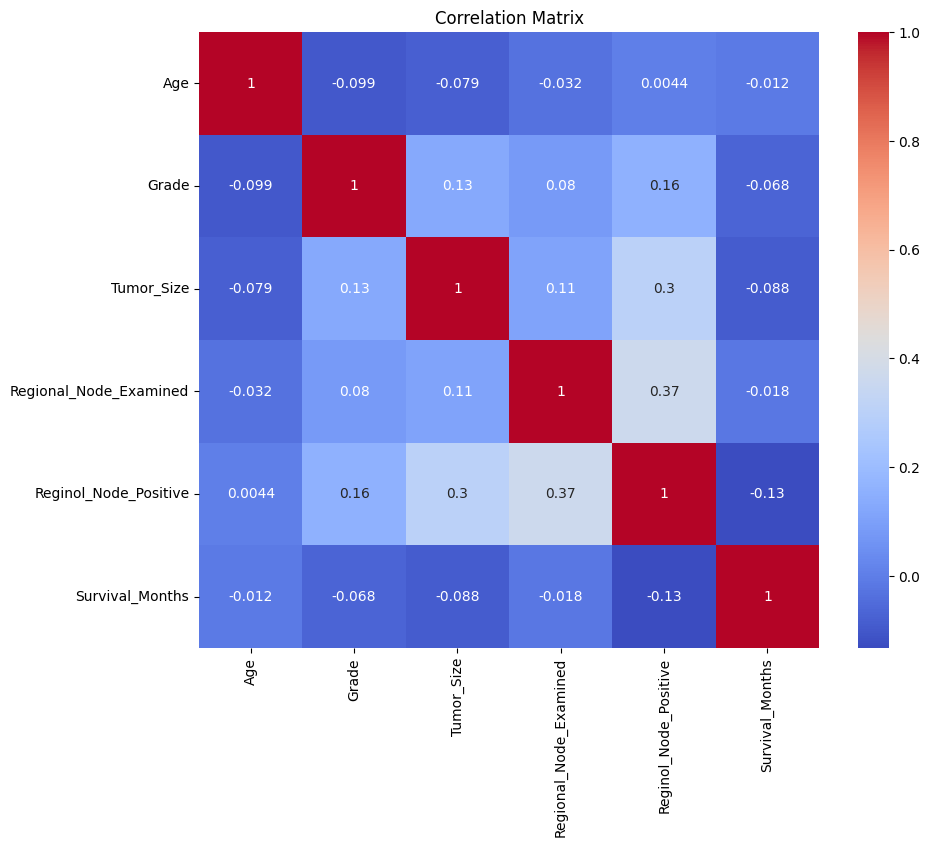

In [119]:
# Create and display a correlation matrix heatmap
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Reused from Coursework Code Reuse Session 2 (Week 7): Creates and displays a bar plot showing the distribution of the 'Mortality_Status' variable in the dataset.

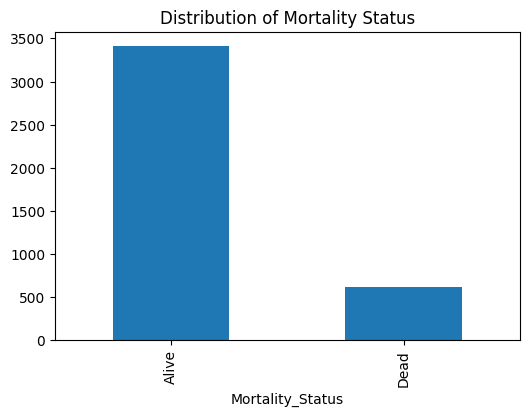

In [120]:
# Create and display a bar plot of 'Mortality_Status' distribution
plt.figure(figsize=(6, 4))
df['Mortality_Status'].value_counts().plot(kind='bar')
plt.title('Distribution of Mortality Status')
plt.show()

Reused from Coursework Code Reuse Session 1 (Week 5): Displays the minimum and maximum values for the numerical columns to understand the range of data in the dataset.

In [122]:
# Display minimum and maximum values for numerical columns
df[numerical_cols].describe().T[['min', 'max']]

,min,max
Age,26.0,82.0
Grade,1.0,4.0
Tumor_Size,1.0,71.0
Regional_Node_Examined,1.0,34.0
Reginol_Node_Positive,1.0,11.0
Survival_Months,5.0,141.0


Reused from Coursework Code Reuse Session 2 (Week 7): Normalizes specified features using MinMaxScaler to scale the data between 0 and 1, ensuring consistency for modeling.

In [123]:
# Normalize specified features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

features_to_normalize = ['Age', 'Grade', 'Tumor_Size',
                         'Regional_Node_Examined', 'Reginol_Node_Positive',
                         'Survival_Months']

scaler = MinMaxScaler()
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

Reused from Coursework Code Reuse Session 1 (Week 5): Prints the data types of the 'Sex' and 'Mortality_Status' columns to verify their variable types.

In [124]:
# Print data types of 'Sex' and 'Mortality_Status'
print(df[['Sex', 'Mortality_Status']].dtypes)

Sex                 category
Mortality_Status      object
dtype: object


Reused from Coursework Code Reuse Session 3 (Week 11): Filters the dataset to include only patients who did not survive (where 'Mortality_Status' is 'Dead'), preparing the data for regression analysis.

In [125]:
# Filter data for patients who did not survive (Mortality_Status == 'Dead')
regression_df = df[df['Mortality_Status'] == 'Dead']

Reused from Coursework Code Reuse Session 3 (Week 11): Displays a statistical summary and the first 5 rows of the filtered data (patients who did not survive) to review key details of the subset.

In [126]:
# Display details of the filtered data
print("Retained Data Subset:")
print(regression_df.describe())  # Statistical summary
print("\nFirst 5 rows:")
print(regression_df.head())  # First few rows for preview

Retained Data Subset:
              Age       Grade  Tumor_Size  Regional_Node_Examined  \
count  616.000000  616.000000  616.000000              616.000000   
mean     0.521716    0.464286    0.486874                0.419520   
std      0.174057    0.209498    0.273635                0.240156   
min      0.071429    0.000000    0.000000                0.000000   
25%      0.392857    0.333333    0.271429                0.242424   
50%      0.553571    0.333333    0.414286                0.393939   
75%      0.660714    0.666667    0.700000                0.575758   
max      1.000000    1.000000    1.000000                1.000000   

       Reginol_Node_Positive  Survival_Months  
count             616.000000       616.000000  
mean                0.449351         0.298833  
std                 0.395503         0.175828  
min                 0.000000         0.000000  
25%                 0.100000         0.161765  
50%                 0.300000         0.286765  
75%                 

Reused from Coursework Code Reuse Session 3 (Week 11): Displays the dimensions (rows and columns) of the retained data subset to confirm the size of the filtered dataset.

In [127]:
# Display dimensions of the retained data subset
print("Dimensions of the retained data subset:", regression_df.shape)

Dimensions of the retained data subset: (616, 15)


Reused from Coursework Code Reuse Session 3 (Week 11): Displays the list of feature names in the retained data subset to review the columns available for analysis.

In [128]:
# Display the list of feature names
print("\nList of feature names:", regression_df.columns.tolist())


List of feature names: ['Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive', 'Survival_Months', 'Mortality_Status']


Reused from Coursework Code Reuse Session 1 (Week 5): Saves the preprocessed dataframe to a CSV file to store the cleaned dataset for future use or analysis.

In [129]:
# Save the preprocessed dataframe to a CSV file
df.to_csv('/content/drive/MyDrive/Final_Datasets/cleaned_dataset.csv', index=False)

Reused from Coursework Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5): Loads the saved CSV file and displays the first few rows along with the dataset information to verify the successful saving and loading of the cleaned dataset.

In [130]:
# Load the saved CSV file and display information
loaded_df = pd.read_csv('/content/drive/MyDrive/Final_Datasets/cleaned_dataset.csv')

print(loaded_df.head())
print(loaded_df.info())

        Age     Sex T_Stage N_Stage 6th_Stage             Differentiated  \
0  0.750000  Female      T1      N1       IIA      Poorly differentiated   
1  0.428571  Female      T2      N2      IIIA  Moderately differentiated   
2  0.571429  Female      T3      N3      IIIC  Moderately differentiated   
3  0.571429  Female      T1      N1       IIA      Poorly differentiated   
4  0.375000  Female      T2      N1       IIB      Poorly differentiated   

      Grade   A_Stage  Tumor_Size Estrogen_Status Progesterone_Status  \
0  0.666667  Regional    0.042857        Positive            Positive   
1  0.333333  Regional    0.485714        Positive            Positive   
2  0.333333  Regional    0.885714        Positive            Positive   
3  0.666667  Regional    0.242857        Positive            Positive   
4  0.666667  Regional    0.571429        Positive            Positive   

   Regional_Node_Examined  Reginol_Node_Positive  Survival_Months  \
0                0.696970          

In [131]:
# Print the data types of each column
print("\nVariable Scale Types:")
print(df.dtypes)


Variable Scale Types:
Age                        float64
Sex                       category
T_Stage                     object
N_Stage                     object
6th_Stage                   object
Differentiated              object
Grade                      float64
A_Stage                     object
Tumor_Size                 float64
Estrogen_Status             object
Progesterone_Status         object
Regional_Node_Examined     float64
Reginol_Node_Positive      float64
Survival_Months            float64
Mortality_Status            object
dtype: object


In [132]:
# Load the cleaned dataset
df = pd.read_csv('/content/drive/MyDrive/Final_Datasets/cleaned_dataset.csv')

In [133]:
# Create the classification dataset
classification_df = df.drop(columns=['Survival_Months'])

classification_df['Mortality_Status'] = classification_df['Mortality_Status'].map({'Alive': 0, 'Dead': 1})

print(classification_df.head())
print(classification_df['Mortality_Status'].value_counts())

        Age     Sex T_Stage N_Stage 6th_Stage             Differentiated  \
0  0.750000  Female      T1      N1       IIA      Poorly differentiated   
1  0.428571  Female      T2      N2      IIIA  Moderately differentiated   
2  0.571429  Female      T3      N3      IIIC  Moderately differentiated   
3  0.571429  Female      T1      N1       IIA      Poorly differentiated   
4  0.375000  Female      T2      N1       IIB      Poorly differentiated   

      Grade   A_Stage  Tumor_Size Estrogen_Status Progesterone_Status  \
0  0.666667  Regional    0.042857        Positive            Positive   
1  0.333333  Regional    0.485714        Positive            Positive   
2  0.333333  Regional    0.885714        Positive            Positive   
3  0.666667  Regional    0.242857        Positive            Positive   
4  0.666667  Regional    0.571429        Positive            Positive   

   Regional_Node_Examined  Reginol_Node_Positive  Mortality_Status  
0                0.696970          

Reused from Coursework Code Reuse Session 3 (Week 11): Creates the regression dataset by dropping the 'Mortality_Status' column and displays the first few rows along with a statistical summary of the 'Survival_Months' feature to review the dataset for regression analysis.

In [134]:
# Create the regression dataset
regression_df = df.drop(columns=['Mortality_Status'])

print(regression_df.head())
print(regression_df['Survival_Months'].describe())

        Age     Sex T_Stage N_Stage 6th_Stage             Differentiated  \
0  0.750000  Female      T1      N1       IIA      Poorly differentiated   
1  0.428571  Female      T2      N2      IIIA  Moderately differentiated   
2  0.571429  Female      T3      N3      IIIC  Moderately differentiated   
3  0.571429  Female      T1      N1       IIA      Poorly differentiated   
4  0.375000  Female      T2      N1       IIB      Poorly differentiated   

      Grade   A_Stage  Tumor_Size Estrogen_Status Progesterone_Status  \
0  0.666667  Regional    0.042857        Positive            Positive   
1  0.333333  Regional    0.485714        Positive            Positive   
2  0.333333  Regional    0.885714        Positive            Positive   
3  0.666667  Regional    0.242857        Positive            Positive   
4  0.666667  Regional    0.571429        Positive            Positive   

   Regional_Node_Examined  Reginol_Node_Positive  Survival_Months  
0                0.696970           

Reused from Coursework Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5): Saves the classification and regression datasets to separate CSV files for future use and analysis.

In [135]:
# Save the classification dataset
classification_df.to_csv('/content/drive/MyDrive/Final_Datasets/classification_dataset.csv', index=False)

# Save the regression dataset
regression_df.to_csv('/content/drive/MyDrive/Final_Datasets/regression_dataset.csv', index=False)

In [136]:
# Load and print the classification and regression datasets
classification_df_loaded = pd.read_csv('/content/drive/MyDrive/Final_Datasets/classification_dataset.csv')
print(classification_df_loaded.head())
print("----------"*10)

regression_df_loaded = pd.read_csv('/content/drive/MyDrive/Final_Datasets/regression_dataset.csv')
print(regression_df_loaded.head())

        Age     Sex T_Stage N_Stage 6th_Stage             Differentiated  \
0  0.750000  Female      T1      N1       IIA      Poorly differentiated   
1  0.428571  Female      T2      N2      IIIA  Moderately differentiated   
2  0.571429  Female      T3      N3      IIIC  Moderately differentiated   
3  0.571429  Female      T1      N1       IIA      Poorly differentiated   
4  0.375000  Female      T2      N1       IIB      Poorly differentiated   

      Grade   A_Stage  Tumor_Size Estrogen_Status Progesterone_Status  \
0  0.666667  Regional    0.042857        Positive            Positive   
1  0.333333  Regional    0.485714        Positive            Positive   
2  0.333333  Regional    0.885714        Positive            Positive   
3  0.666667  Regional    0.242857        Positive            Positive   
4  0.666667  Regional    0.571429        Positive            Positive   

   Regional_Node_Examined  Reginol_Node_Positive  Mortality_Status  
0                0.696970          

In [137]:
# Save the preprocessed data to a CSV file
df.to_csv('/content/drive/MyDrive/Final_Datasets/preprocessed_data.csv', index=False)